# Введение в алгоритм DBSCAN

Посмотрим визуально на разницу между DBSCAN и другими алгоритмами кластеризации, такими как K-Means Clustering.

При желании можно также посмотреть следующий инструмент визуализации: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

## DBSCAN и примеры кластеризации данных

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
blobs = pd.read_csv('../DATA/cluster_blobs.csv')

In [7]:
blobs.head()

X1        X2
0  4.645333  6.822294
1  4.784032  6.422883
2 -5.851786  5.774331
3 -7.459592  6.456415
4  4.918911  6.961479

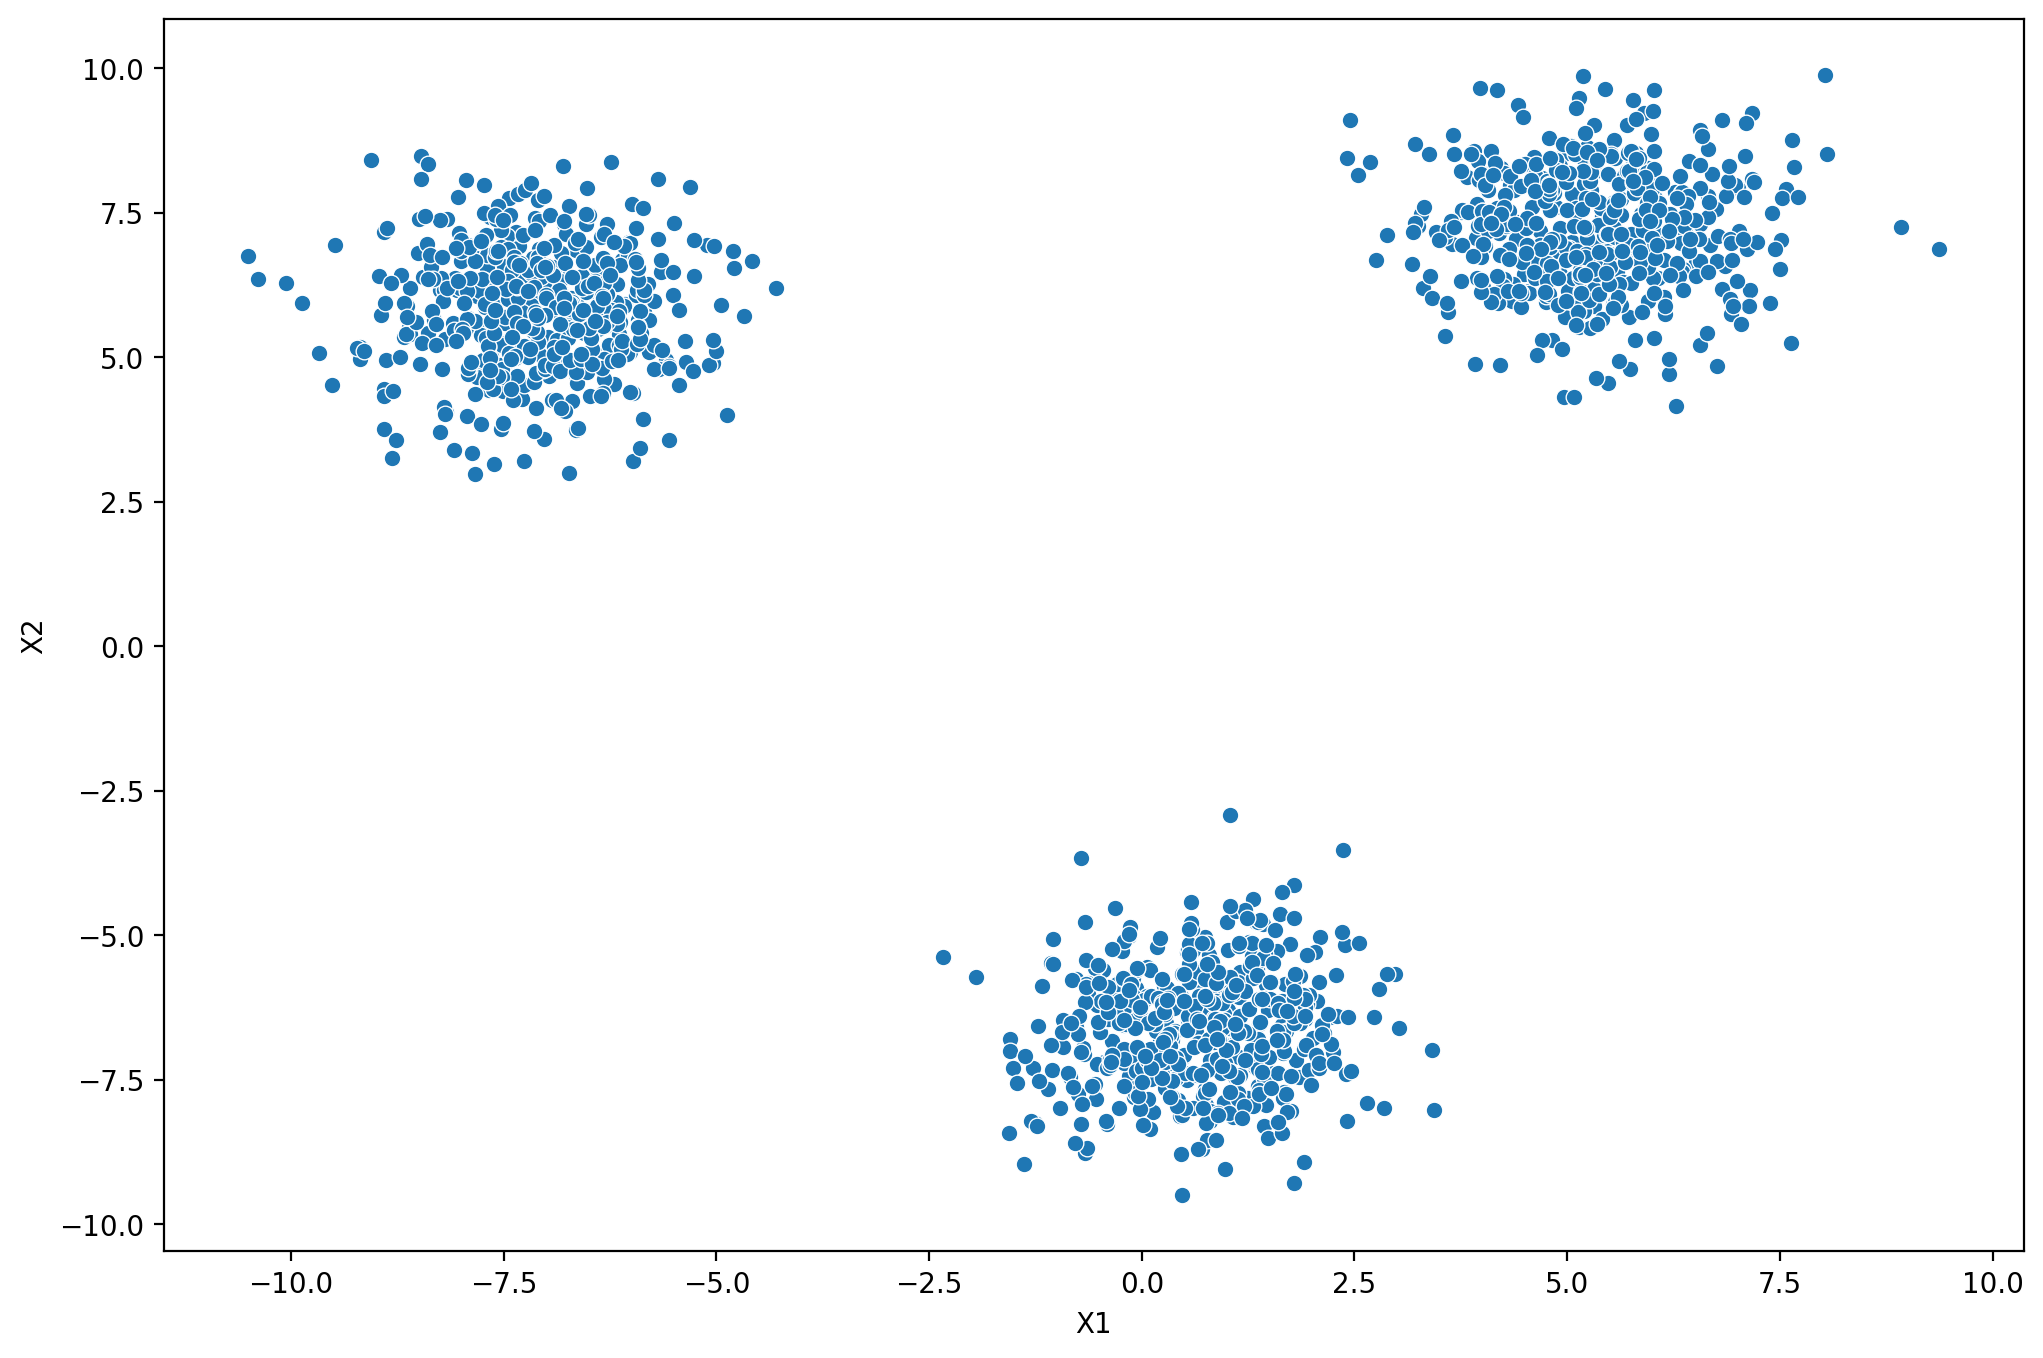

In [9]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(data=blobs, x='X1', y='X2')
plt.show()

Видим здесь три кластера с признаками. **Важно: это неразмеченные данные.**

In [12]:
moons = pd.read_csv('../DATA/cluster_moons.csv')

In [14]:
moons.head()

X1        X2
0  0.674362 -0.444625
1  1.547129 -0.239796
2  1.601930 -0.230792
3  0.014563  0.449752
4  1.503476 -0.389164

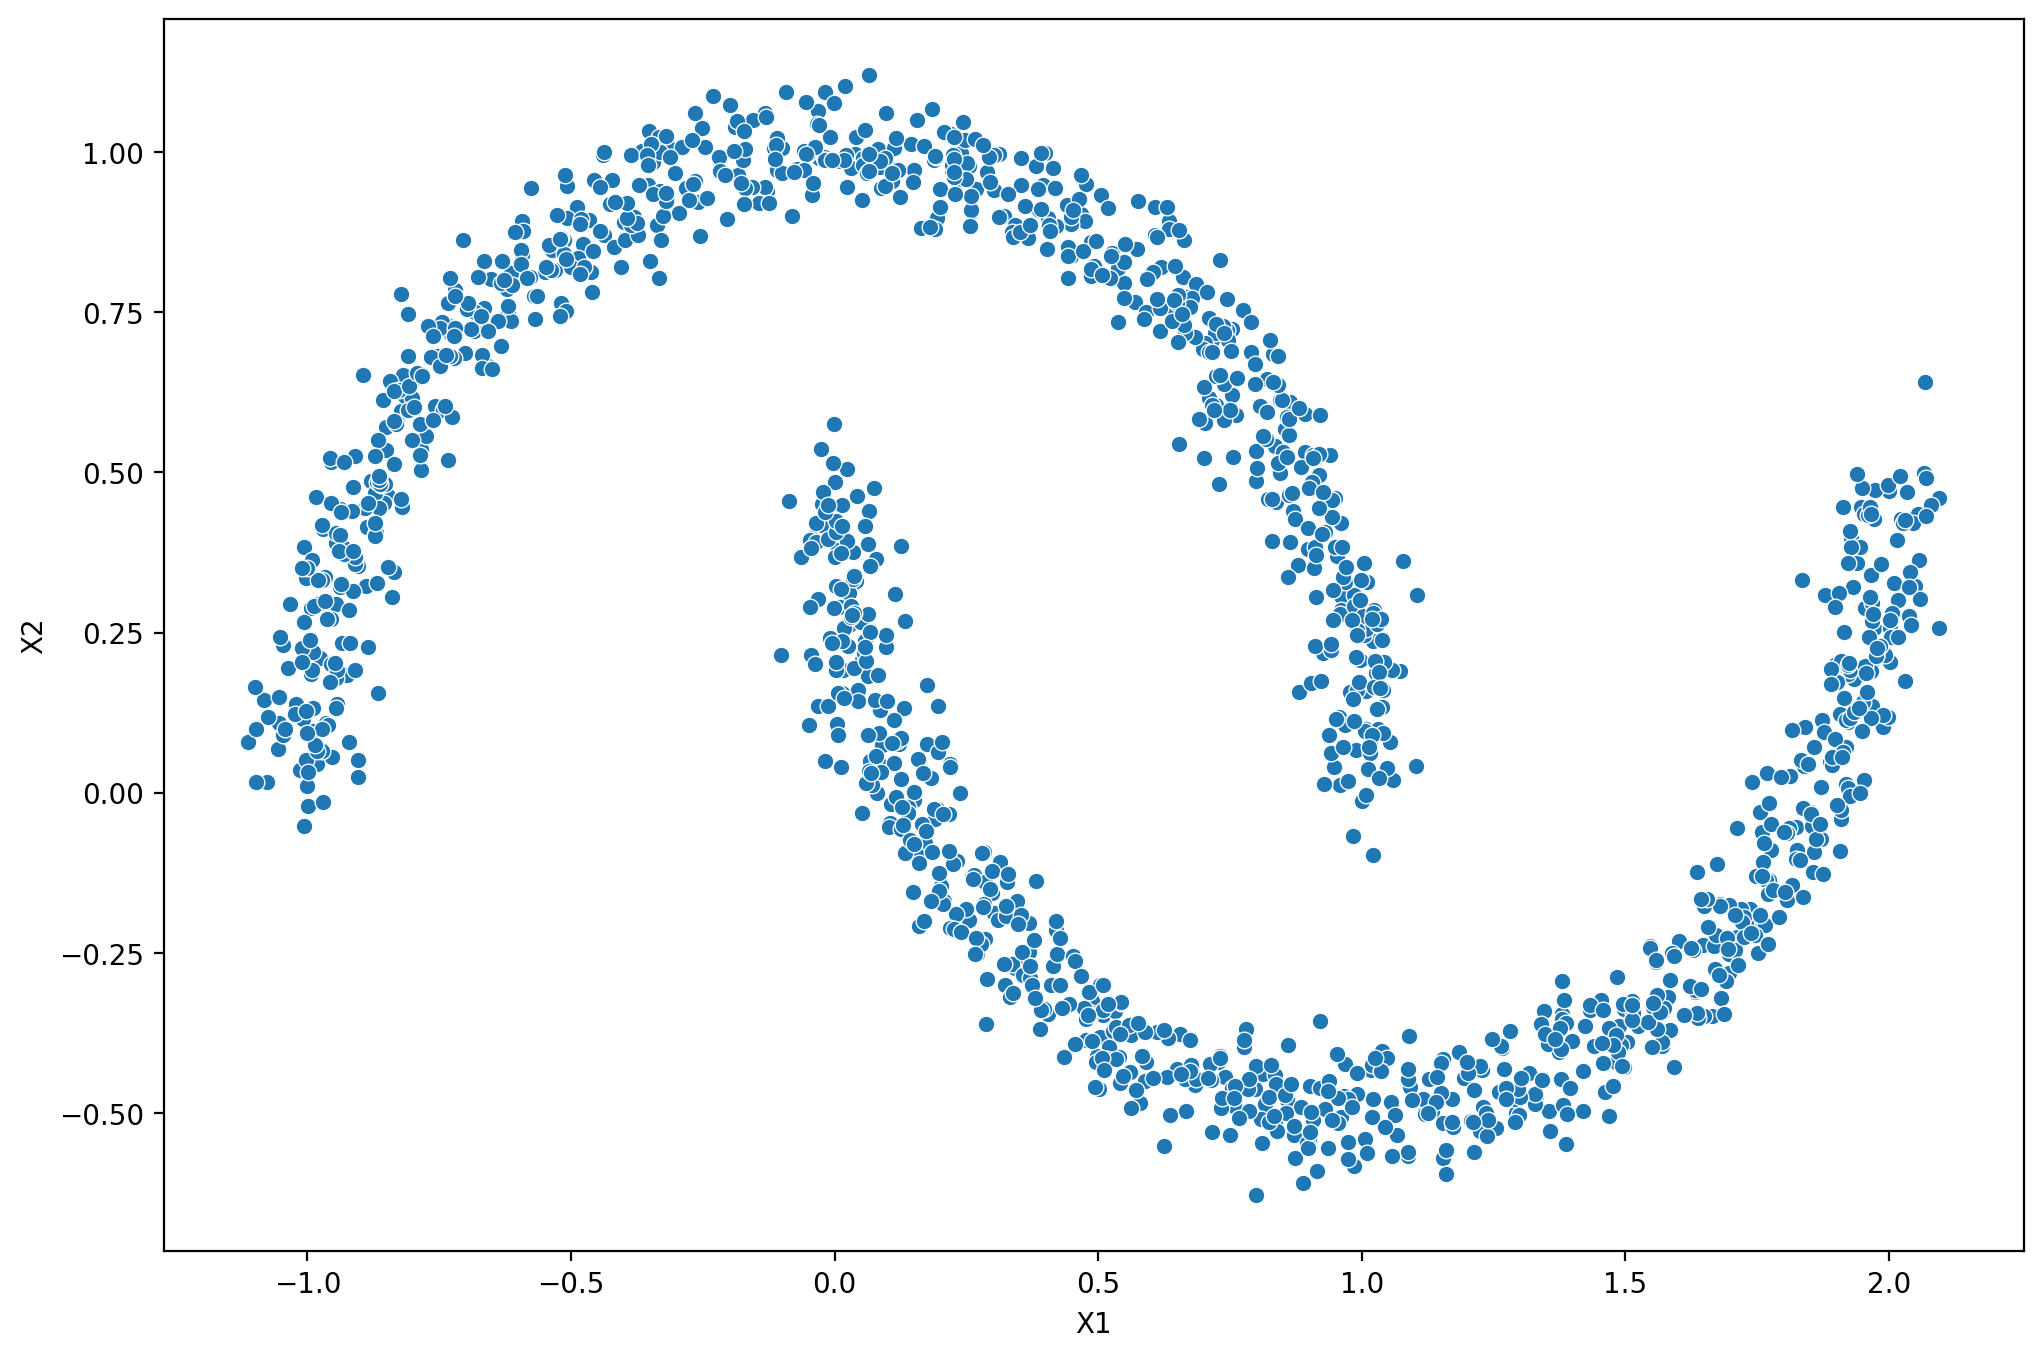

In [16]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(data=moons, x='X1', y='X2')
plt.show()

Можно заметить, что окончания полумесяцев очень близки к соседнему полумесяцу.

In [19]:
circles = pd.read_csv('../DATA/cluster_circles.csv')

In [21]:
circles.head()

X1        X2
0 -0.348677  0.010157
1 -0.176587 -0.954283
2  0.301703 -0.113045
3 -0.782889 -0.719468
4 -0.733280 -0.757354

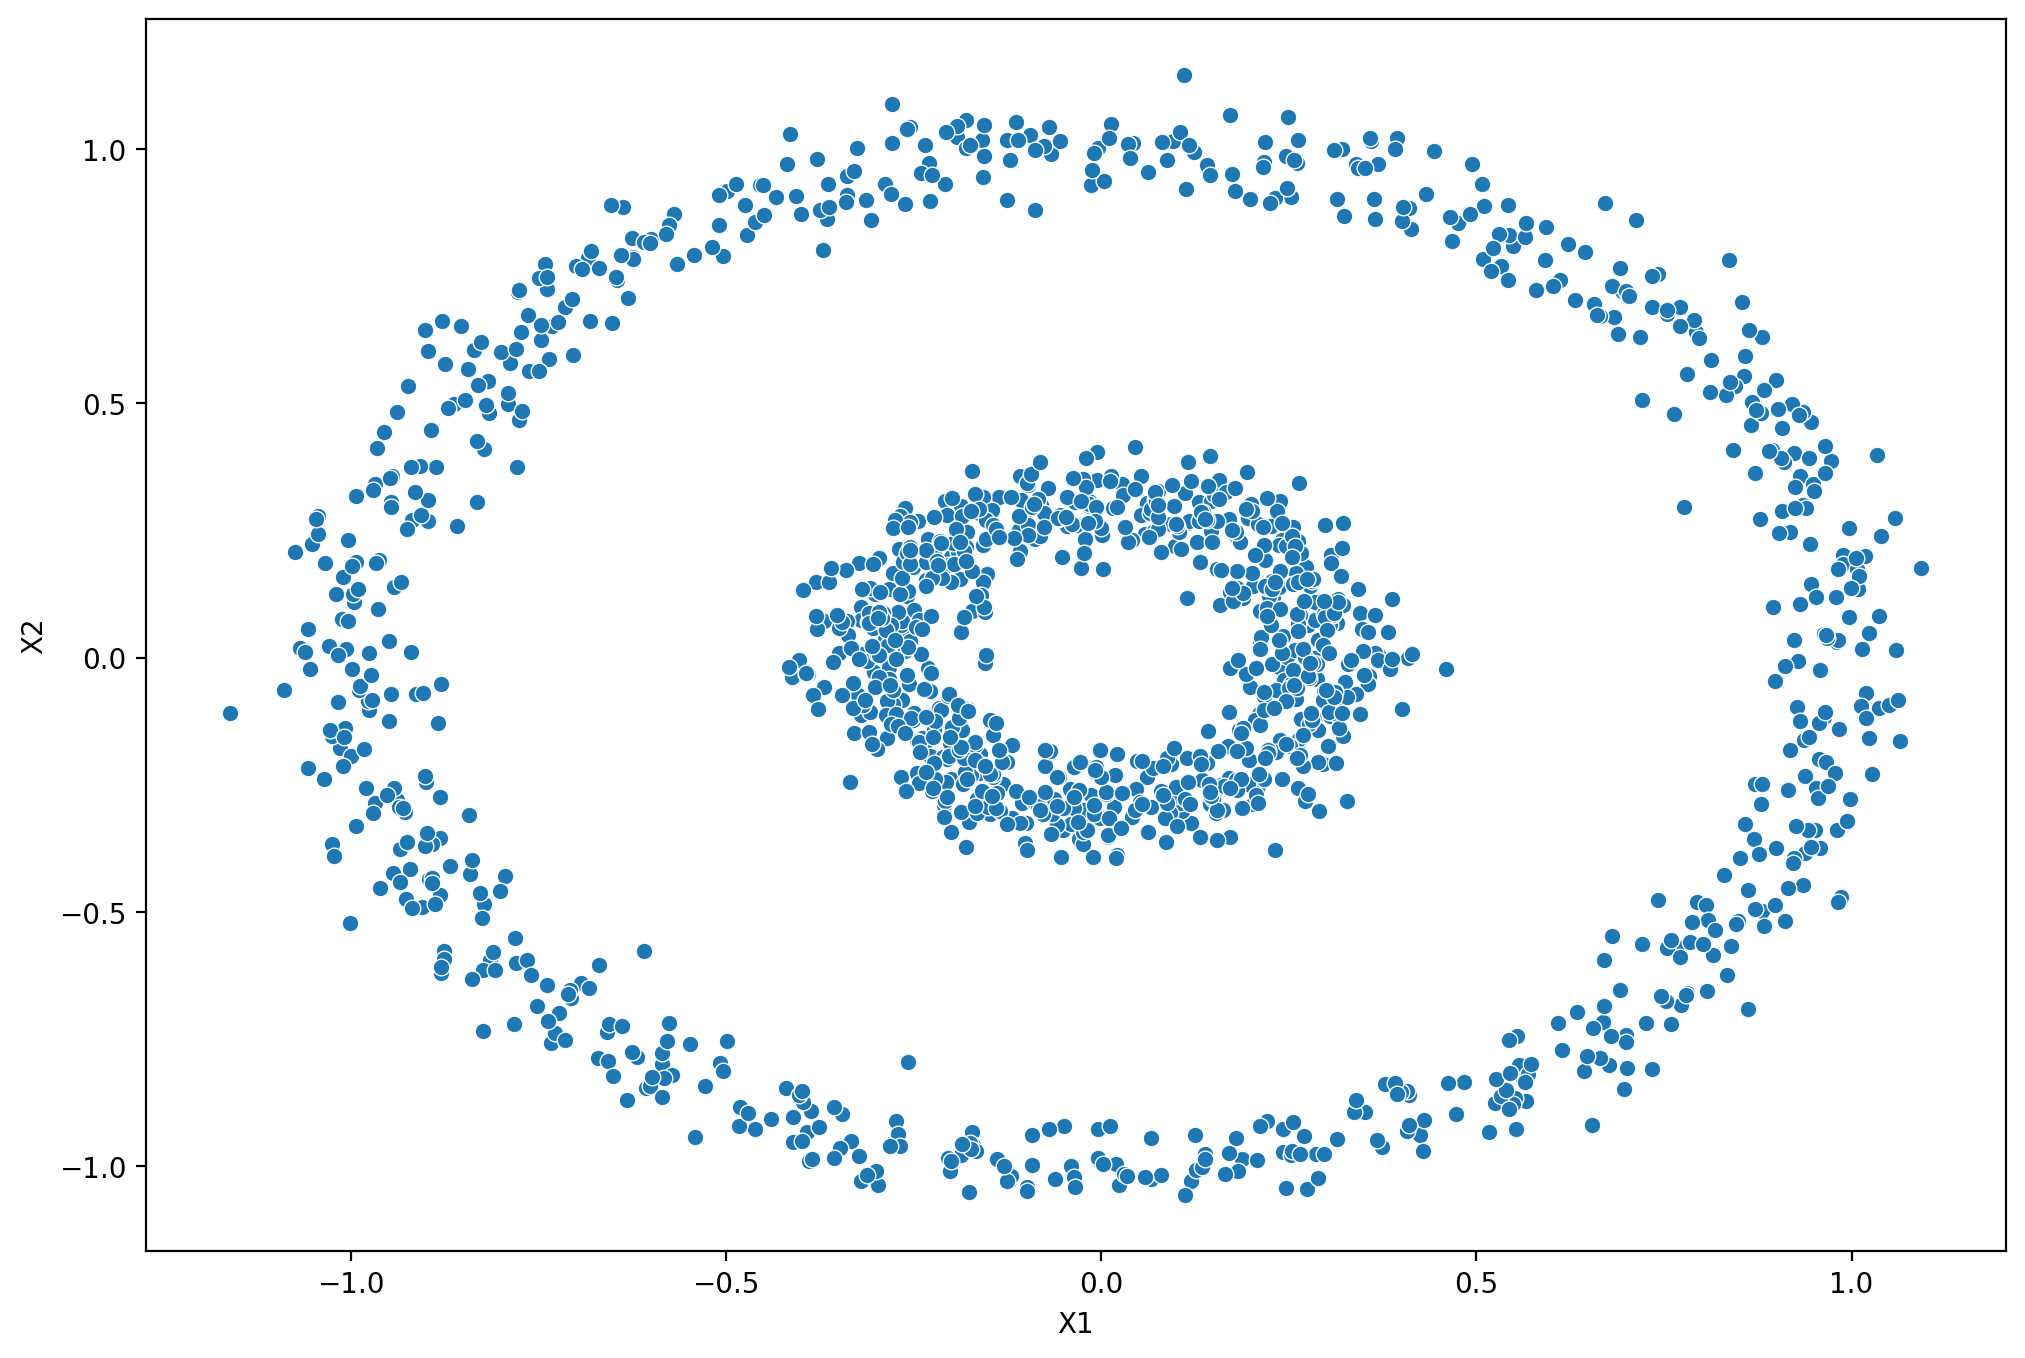

In [23]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(data=circles, x='X1', y='X2')
plt.show()

## "Создаём" целевую переменную с помощью кластеризации (Label Discovery)

In [26]:
def display_categories(model, data):
    
    labels = model.fit_predict(data)
    
    plt.figure(figsize=(12, 8), dpi=200)
    sns.scatterplot(data=data, x='X1', y='X2', hue=labels, palette='Set1')
    plt.show()

## Результаты Kmeans

In [29]:
from sklearn.cluster import KMeans

In [31]:
model = KMeans(n_clusters=3)

C:\Users\chern\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


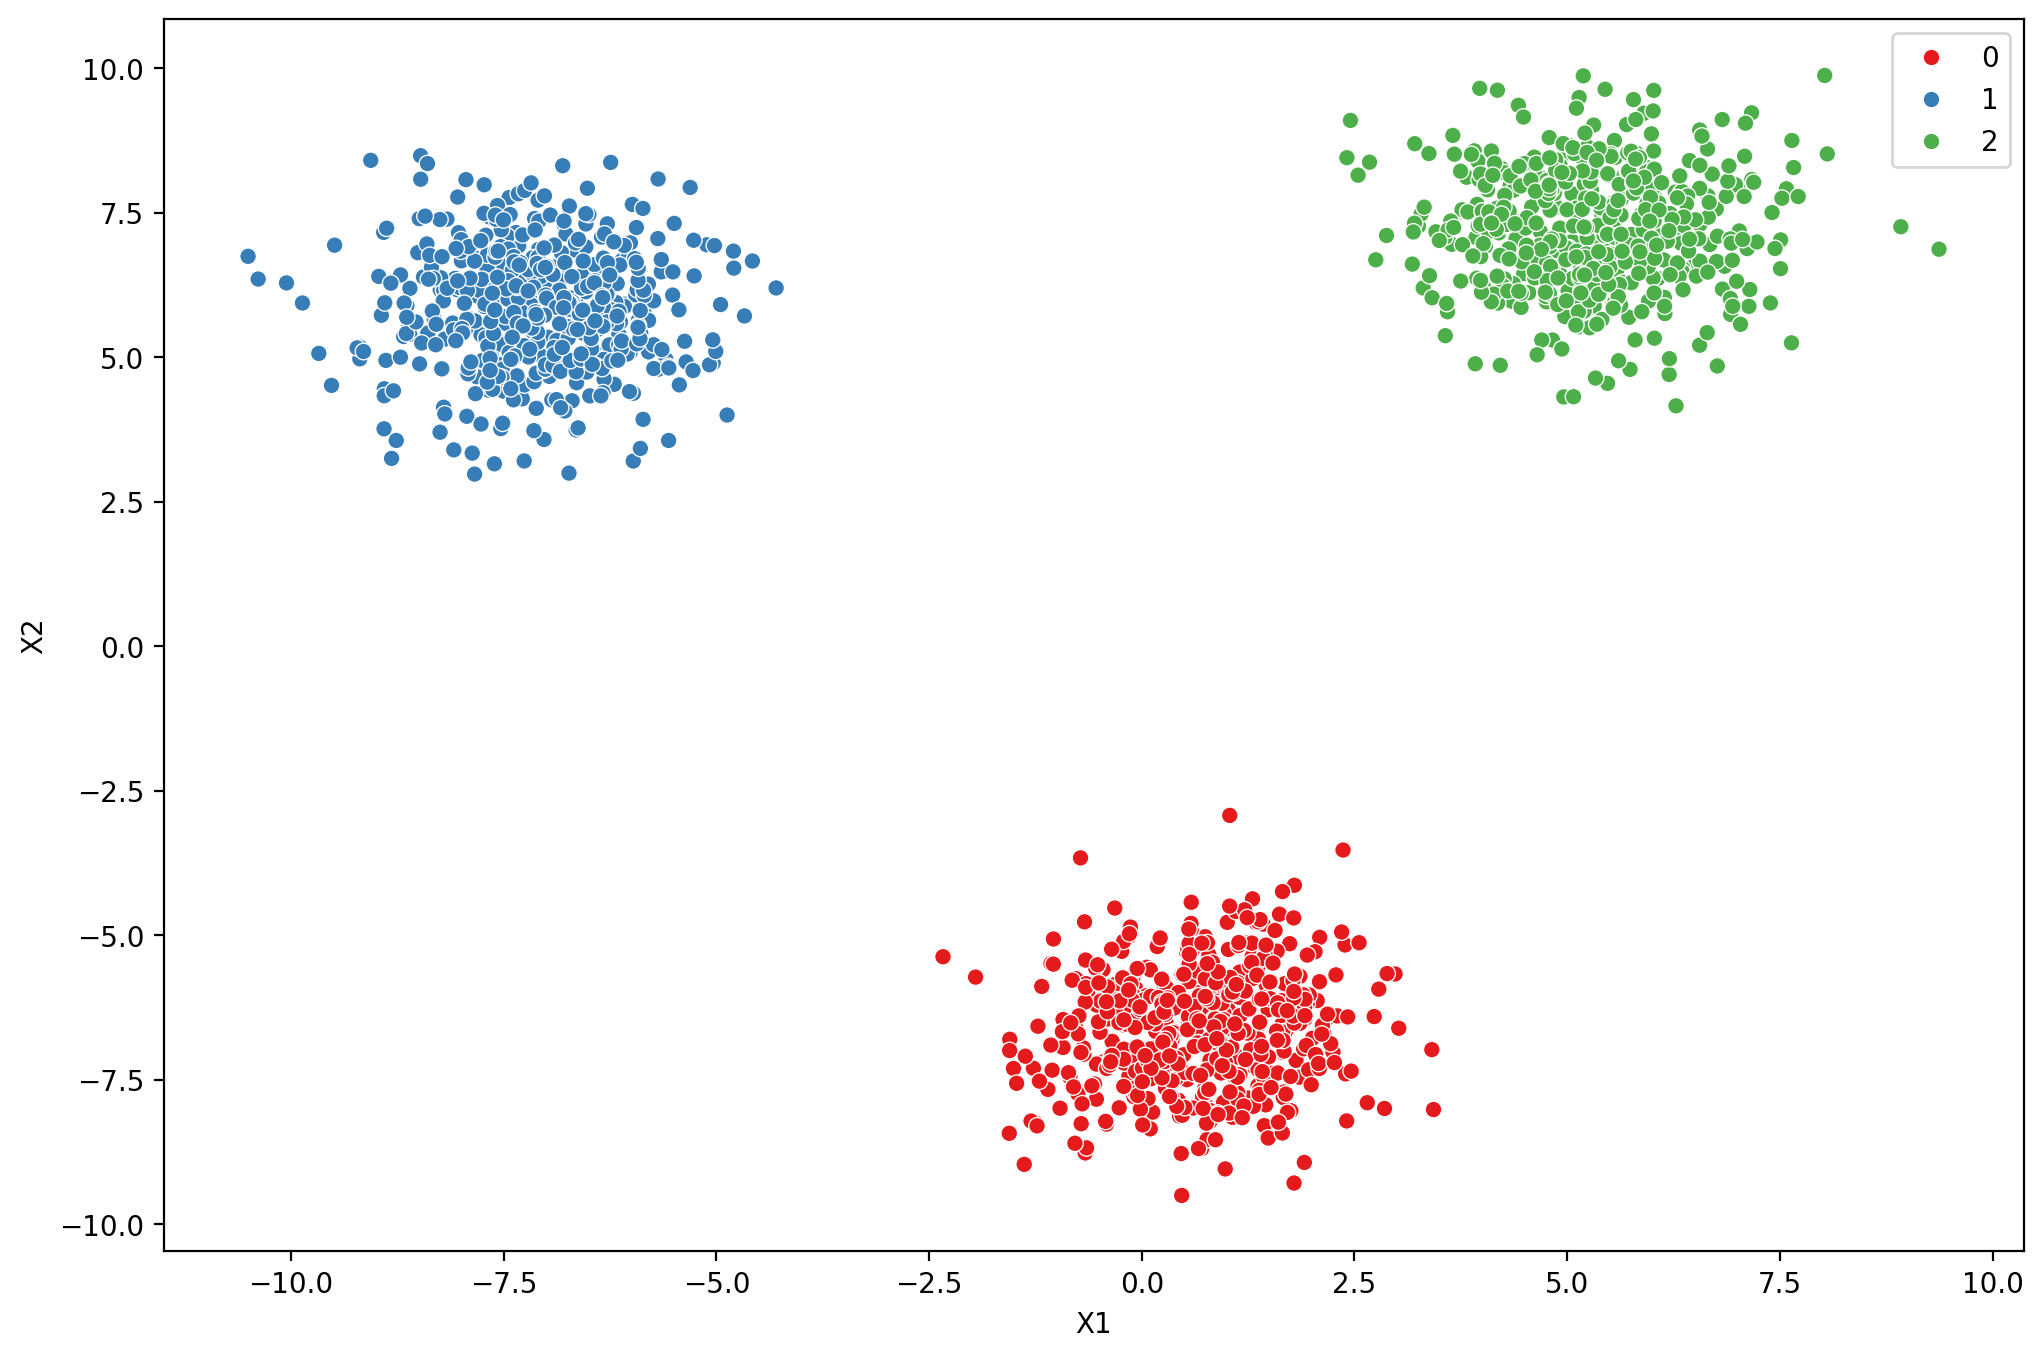

In [33]:
display_categories(model, blobs)

In [35]:
model = KMeans(n_clusters=2)

C:\Users\chern\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


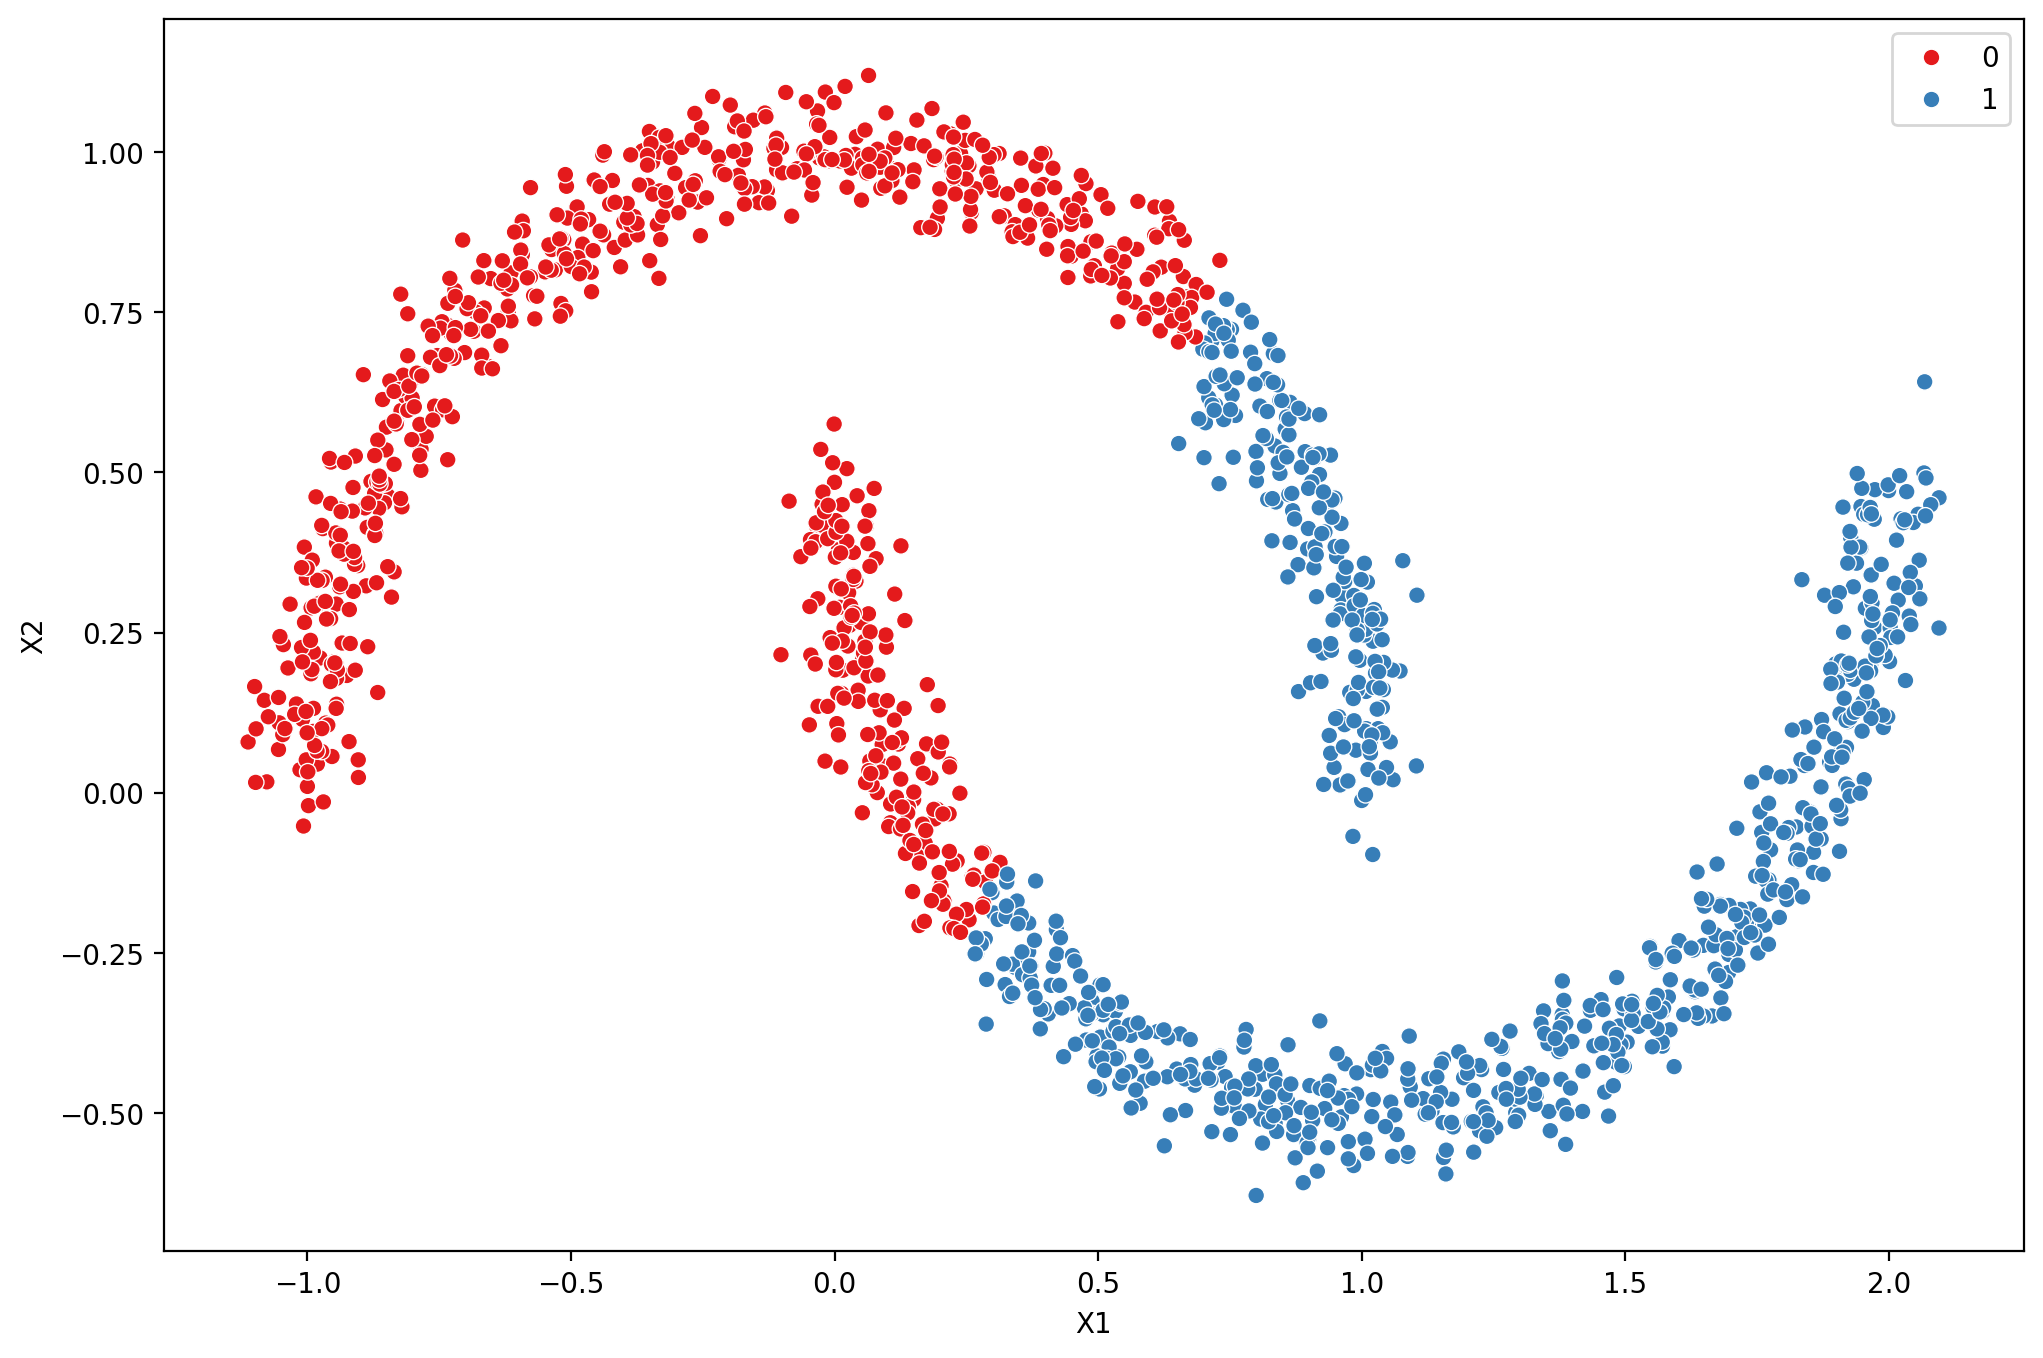

In [37]:
display_categories(model, moons)

Kmeans использует расстояние между точками в качестве метрики для определения того, какие точки к какому кластеру отнести. Получилось, что начало верхней луны, а также небольшая часть нижней луны - находятся настолько близко друг к другу, что алгоритм решил объединить их в единый кластер.

В итоге, данные как бы разбились с помощью некоторой невидимой линии, получив два набора точек, которые близки друг к другу. Однако две луны, отдельно друг от друга, не были получены. 

C:\Users\chern\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


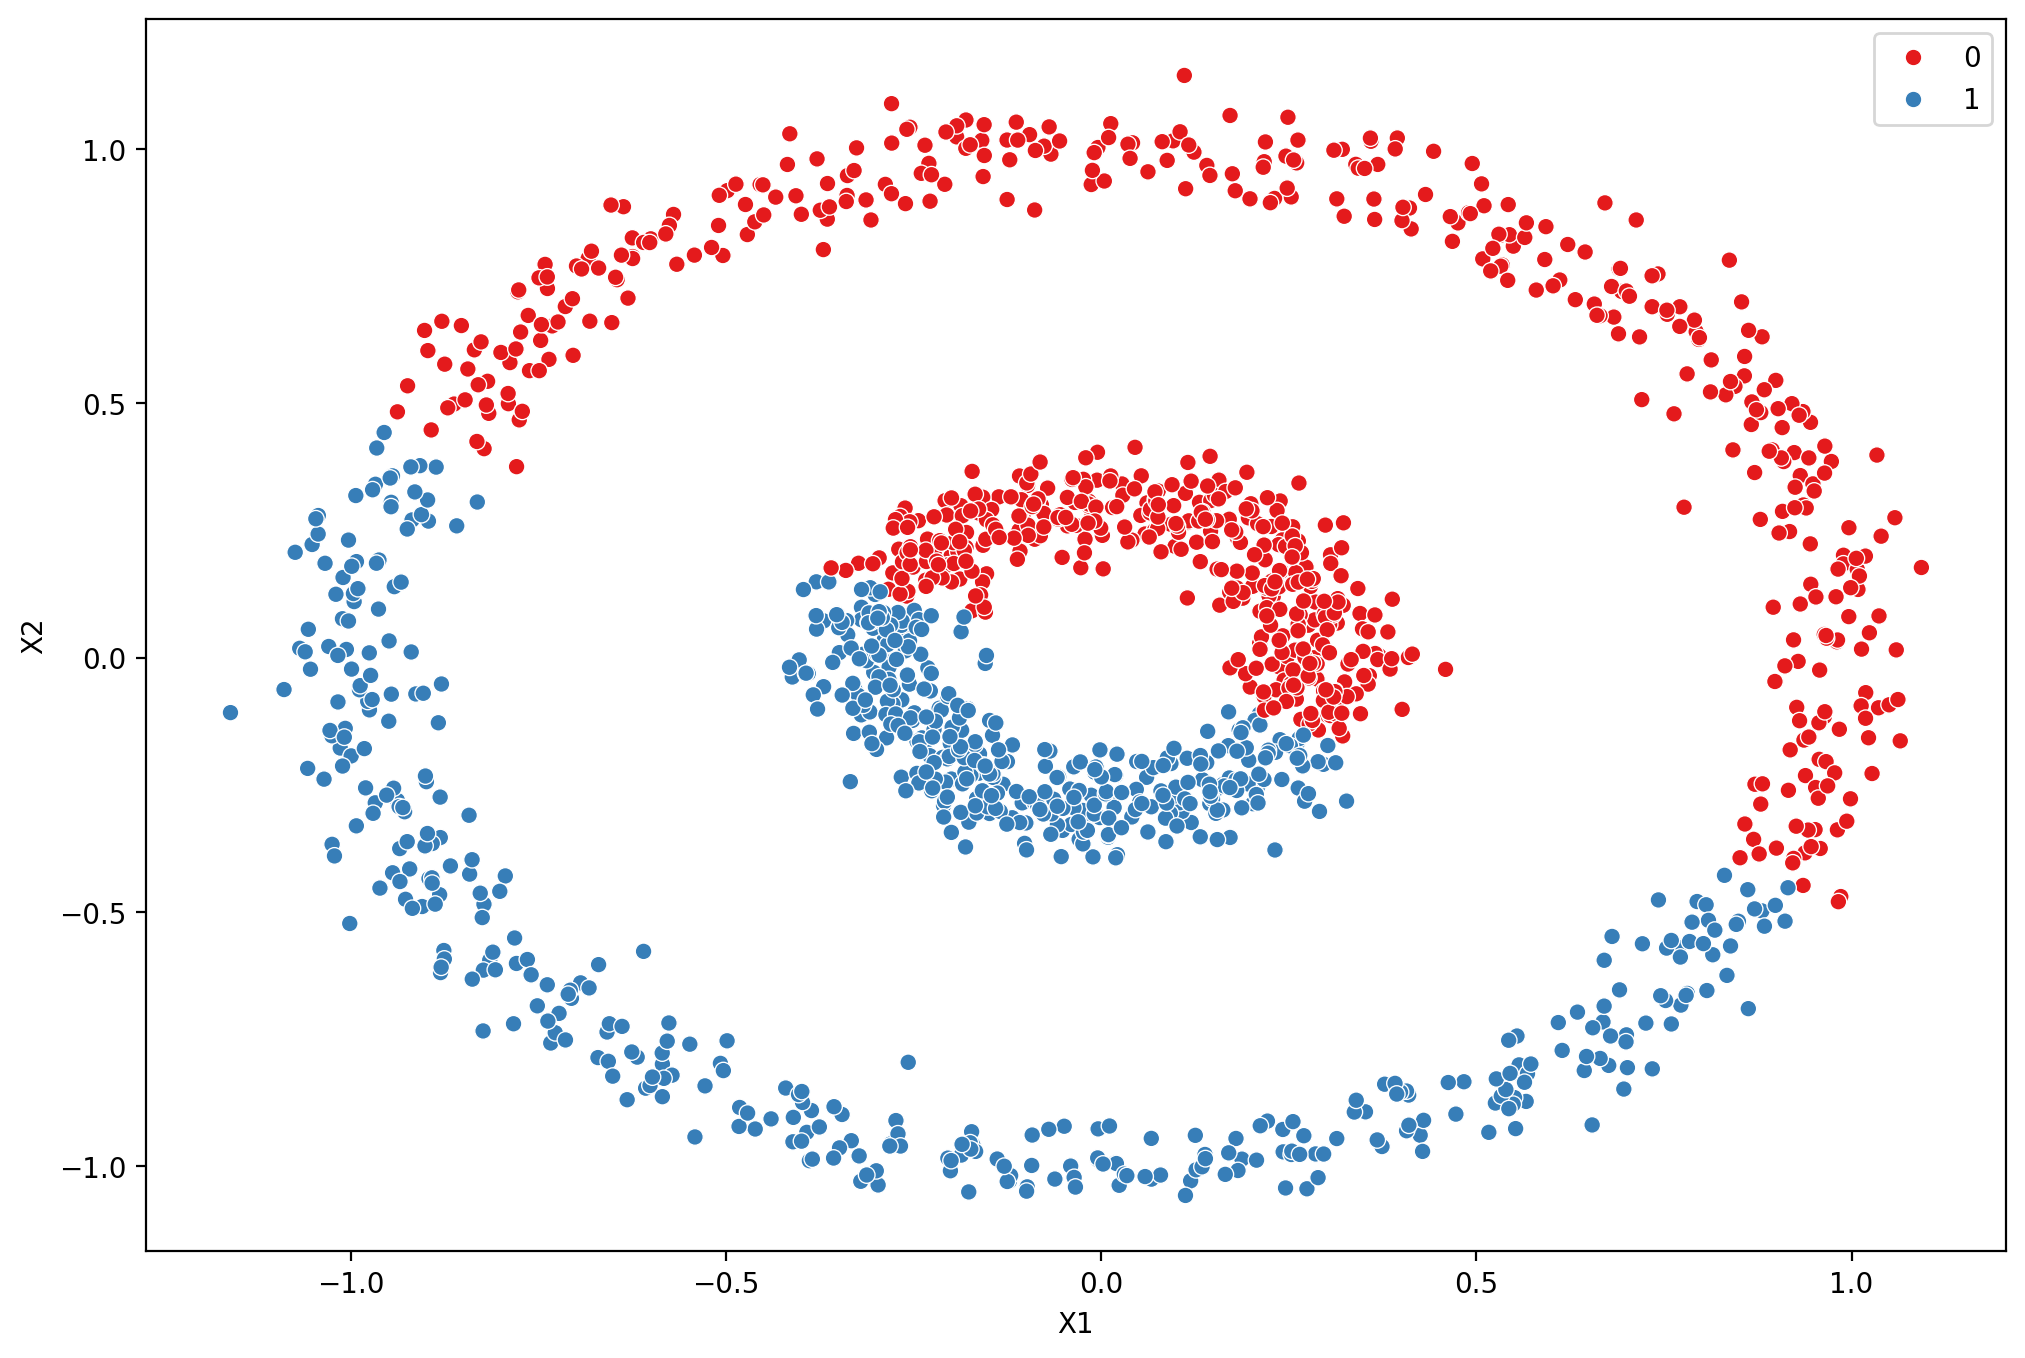

In [40]:
model = KMeans(n_clusters=2)
display_categories(model, circles)

Здесь мы также не получили отдельно каждый из двух кругов.

## Результаты DBSCAN

In [44]:
from sklearn.cluster import DBSCAN

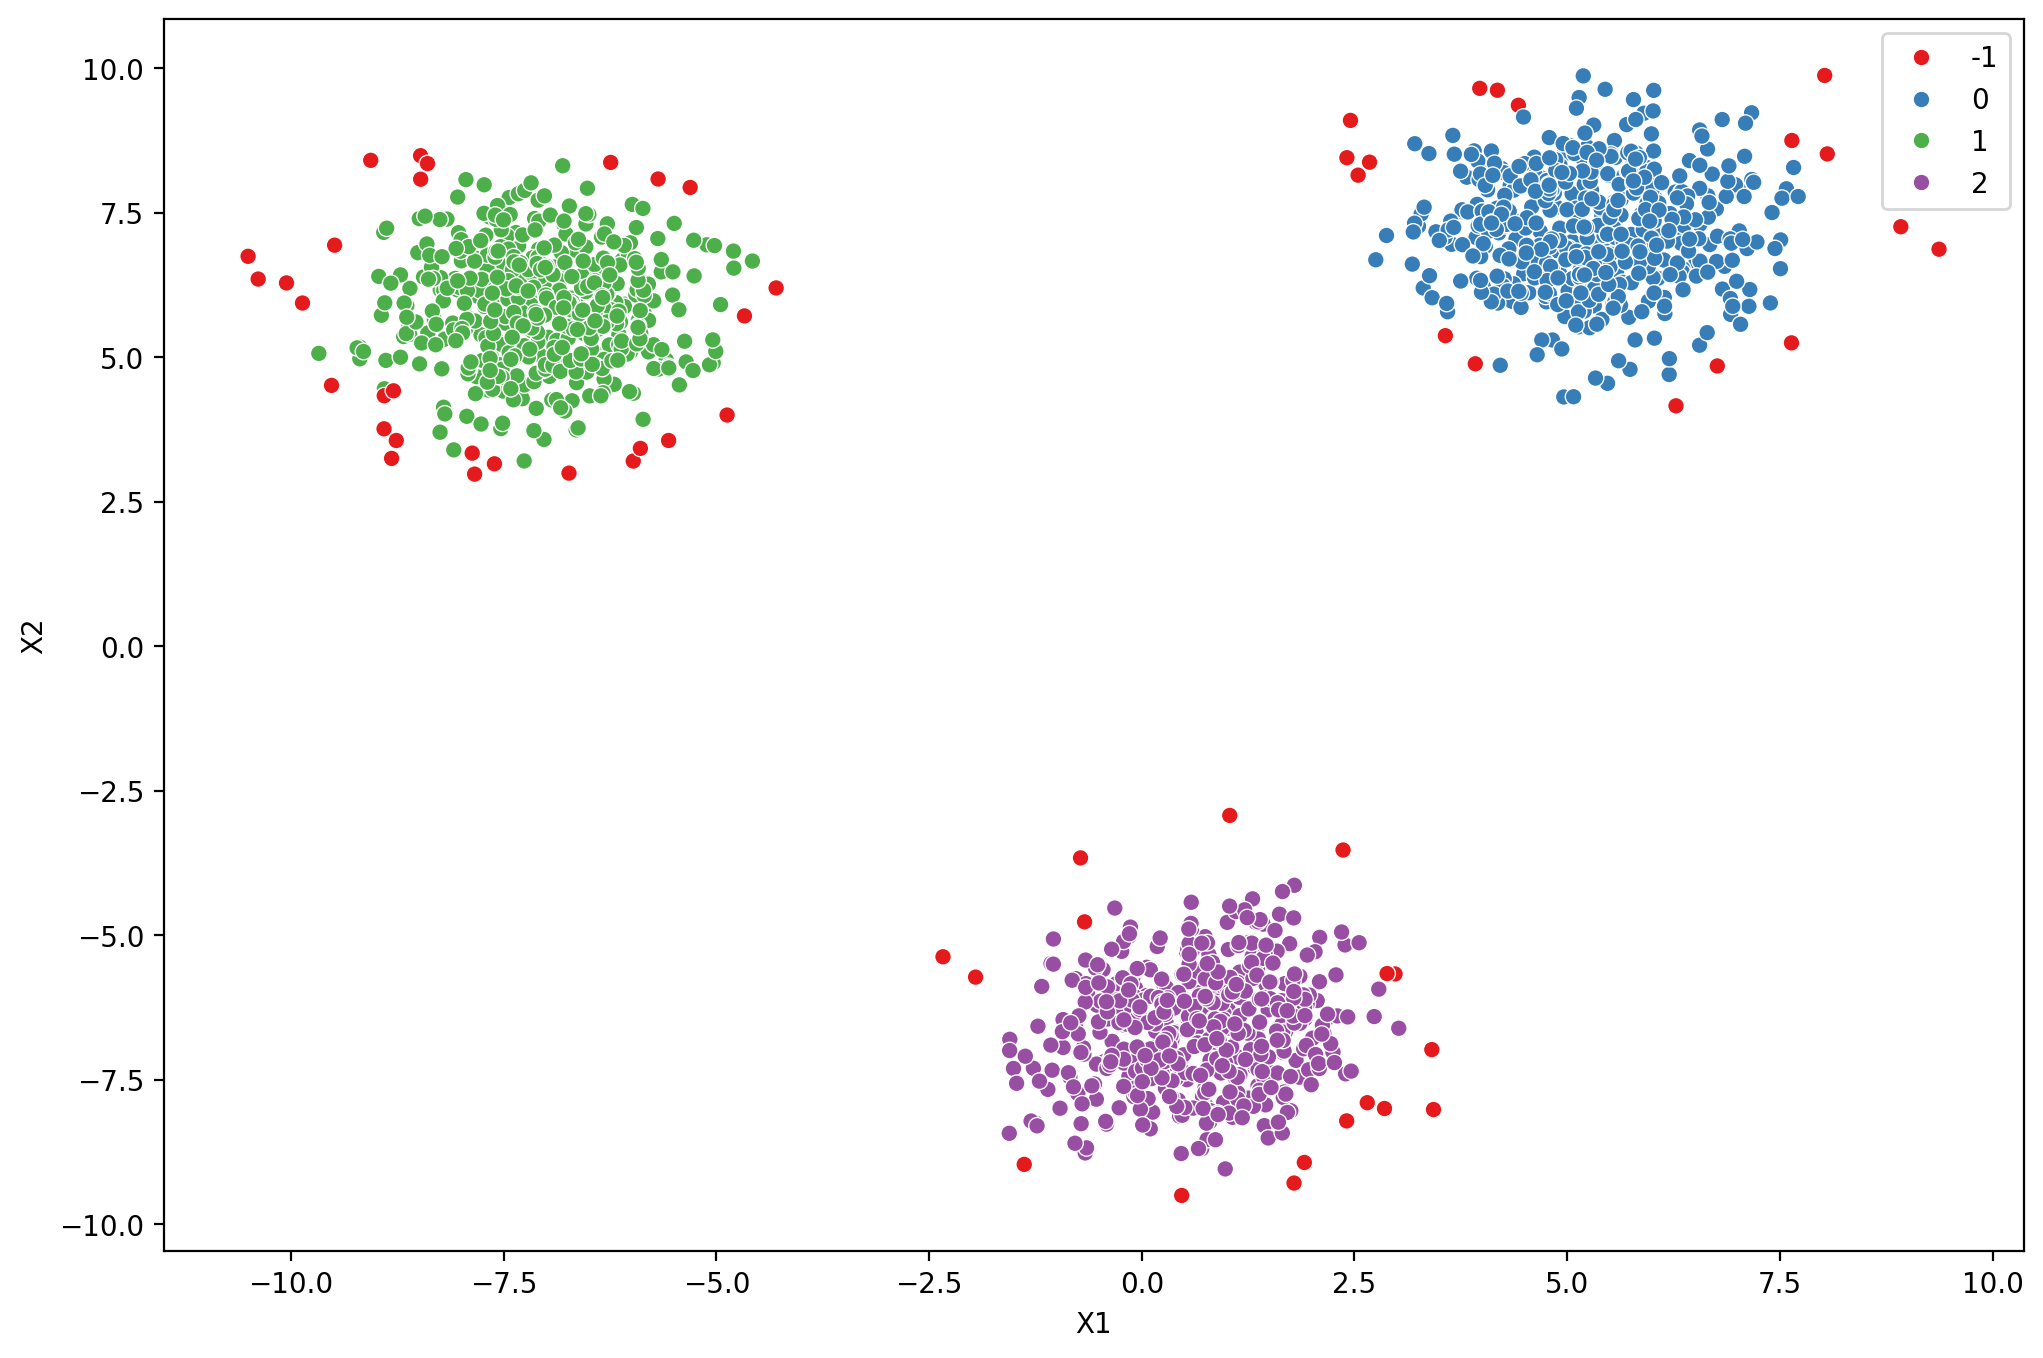

In [46]:
model = DBSCAN()
display_categories(model, blobs)

Алгоритм нашел три кластера, но также были найдены точки выбросы, которые были обозначены с помощью отдельного кластера под номером -1. Какие точки считать выбросами зависит от параметра $\varepsilon$.

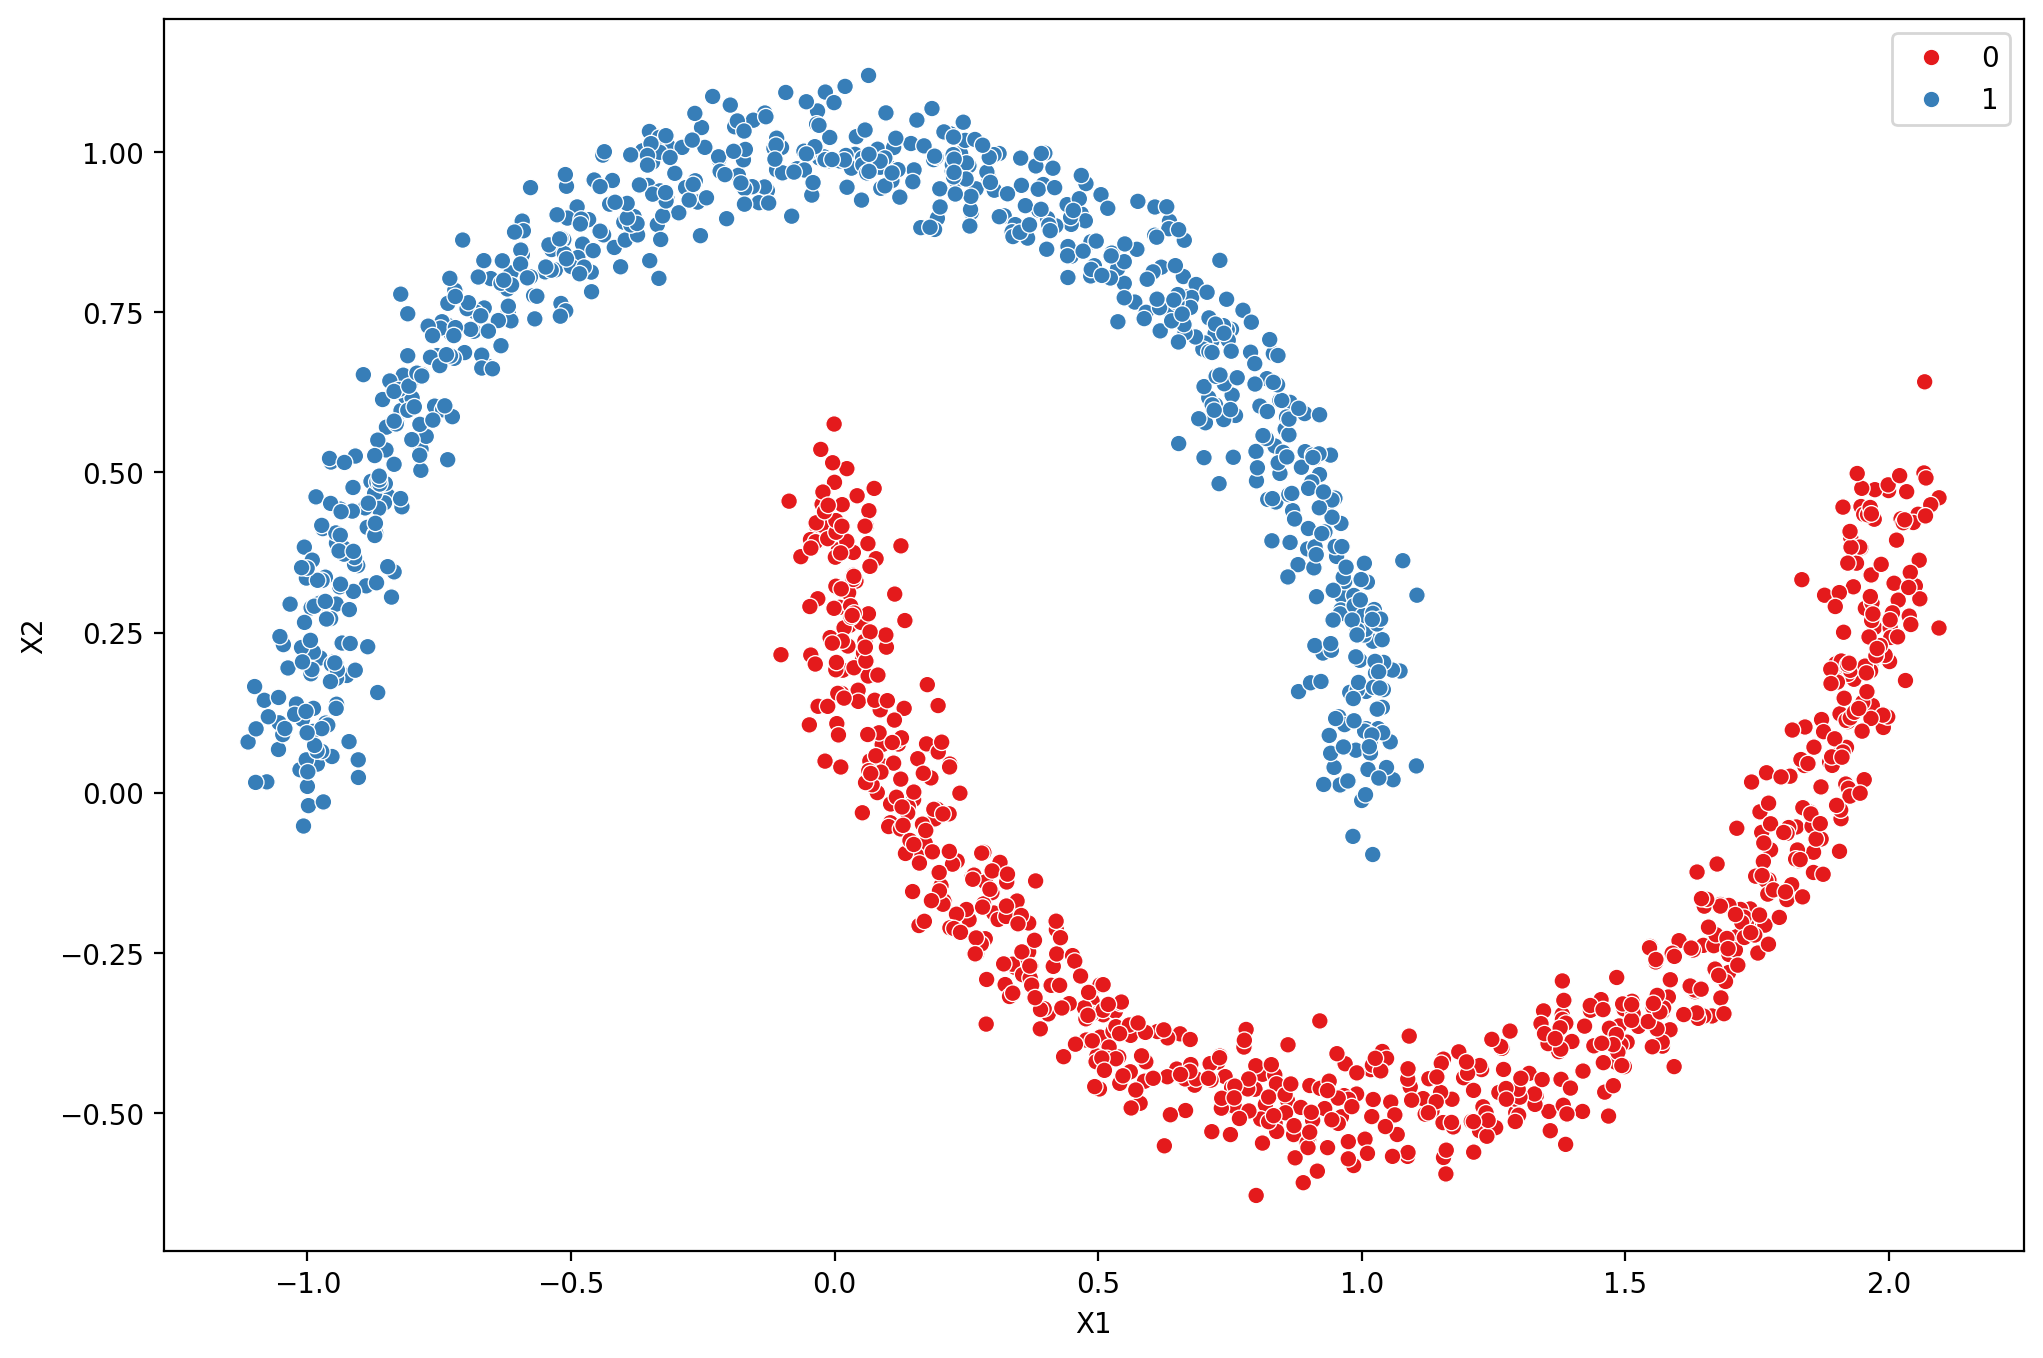

In [49]:
model = DBSCAN(eps=0.15)
display_categories(model, moons)

Мы получаем две луны отдельно друг от друга. Также здесь нет выбросов, но это благодаря выбранному значению гиперпараметра $\varepsilon$.

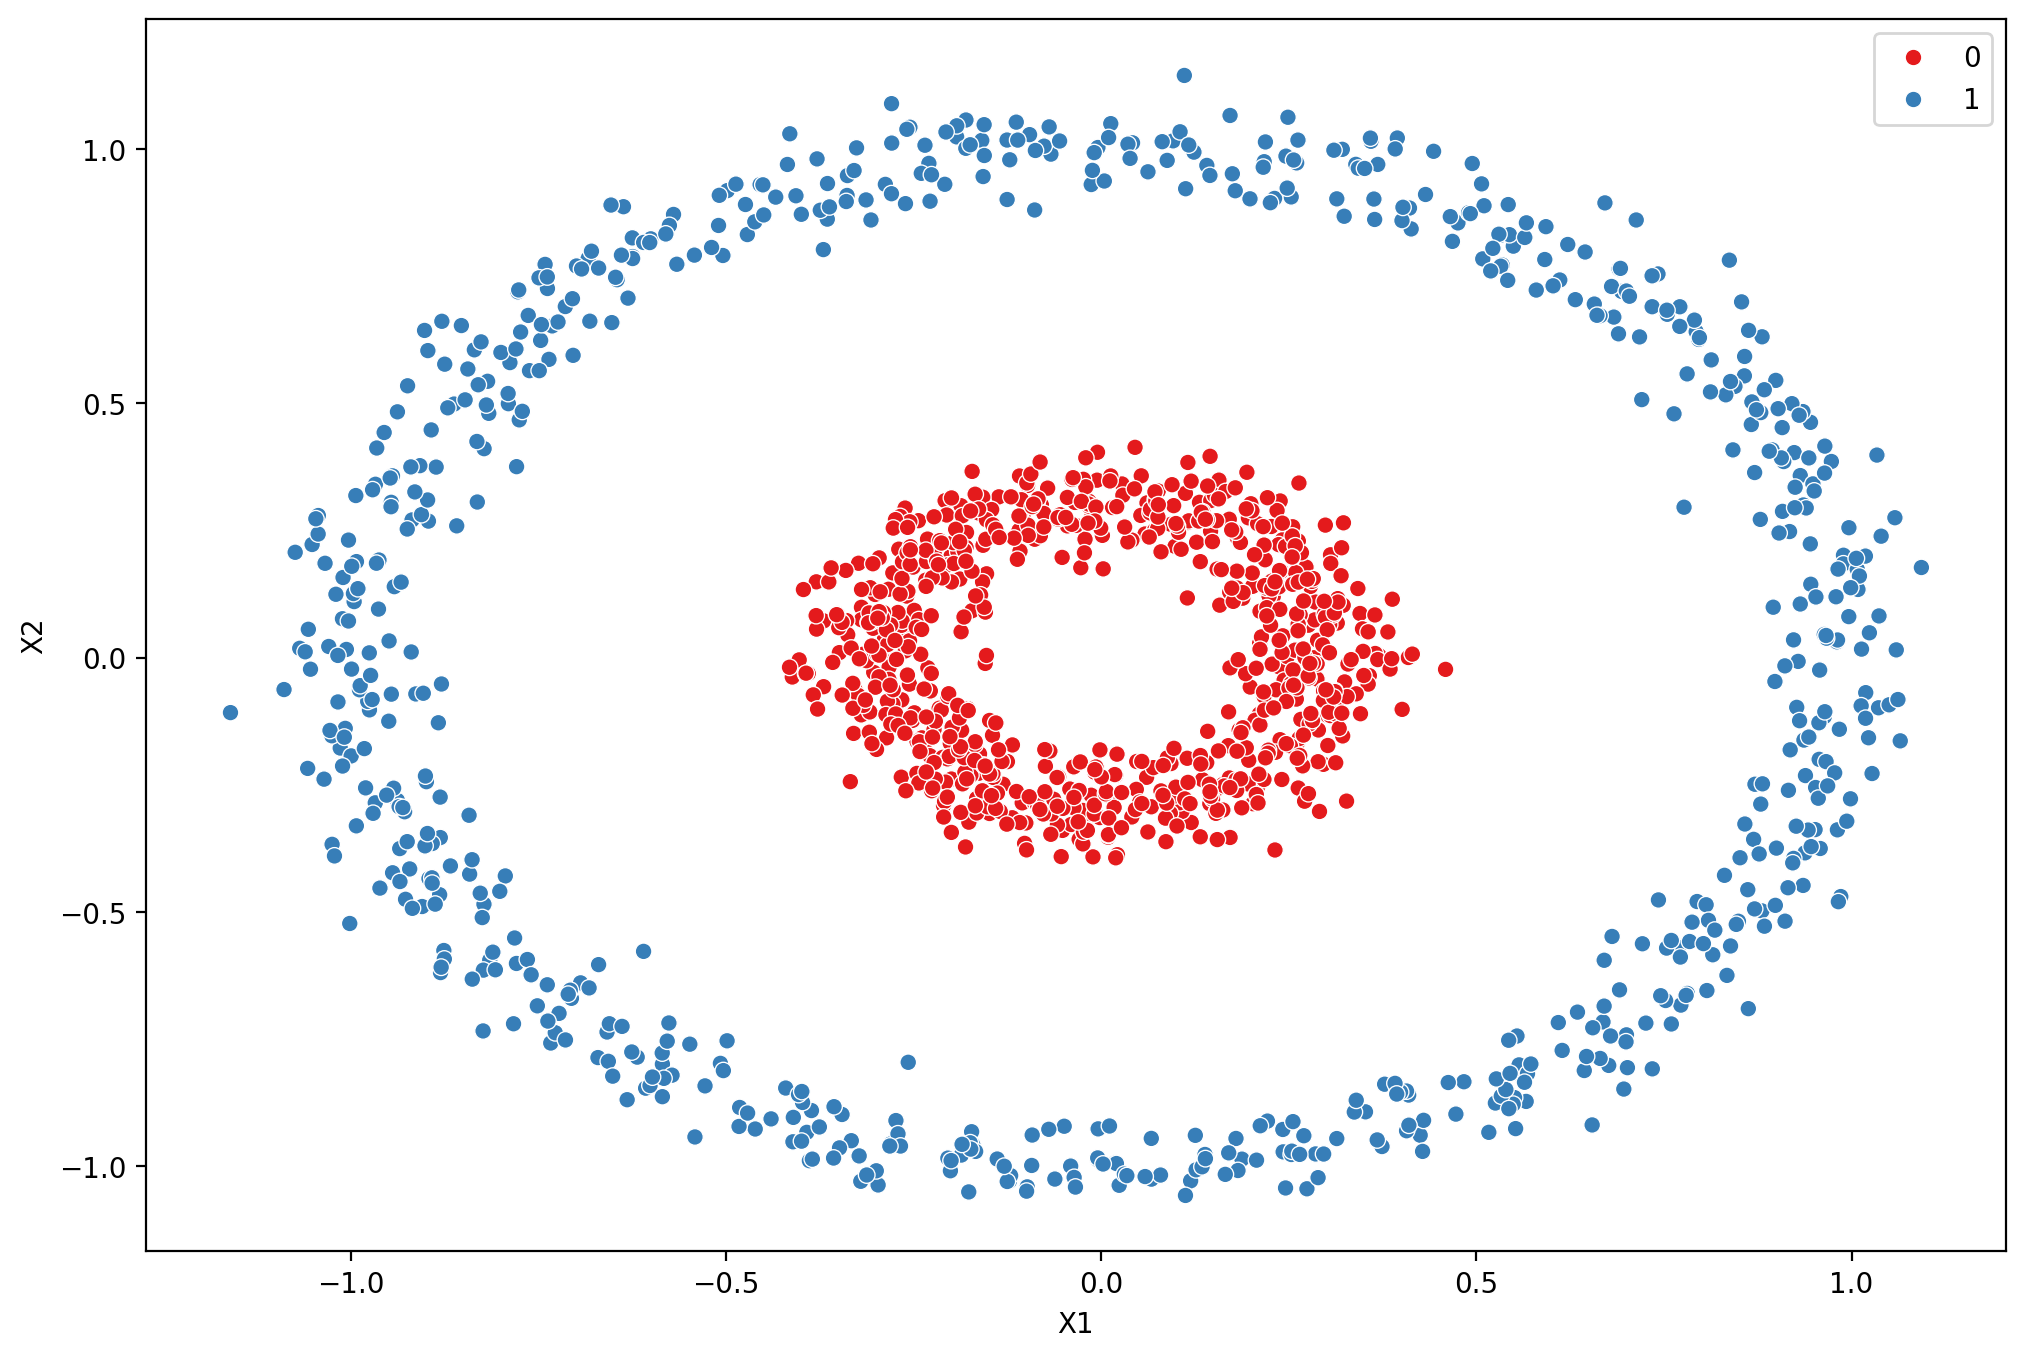

In [52]:
model = DBSCAN(eps=0.15)
display_categories(model, circles)